# Absenteeism at work Data Set (Projects Dynamics M20 -16)

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from scipy.stats import boxcox
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso,Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.externals import joblib
import warnings
warnings.filterwarnings('ignore')

C:\Users\arkay\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
data=pd.read_csv('Absenteeism.csv')
data
# The data set allows for several new combinations of attributes and attribute exclusions, or the modification of the attribute type (categorical, integer, or real) depending on the purpose of the research.
# The data set (Absenteeism at work - Part I) was used in academic research at the Universidade Nove de Julho - Postgraduate Program in Informatics and Knowledge Management.

# Attribute Information:
# 1. Individual identification (ID)
# 2. Reason for absence (ICD).
#Absences attested by the International Code of Diseases (ICD) stratified into 21 categories (I to XXI) as follows:
#      I Certain infectious and parasitic diseases
#     II Neoplasms
#     III Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism
#     IV Endocrine, nutritional and metabolic diseases
#     V Mental and behavioural disorders
#     VI Diseases of the nervous system
#     VII Diseases of the eye and adnexa
#     VIII Diseases of the ear and mastoid process
#     IX Diseases of the circulatory system
#     X Diseases of the respiratory system
#     XI Diseases of the digestive system
#     XII Diseases of the skin and subcutaneous tissue
#     XIII Diseases of the musculoskeletal system and connective tissue
#     XIV Diseases of the genitourinary system
#     XV Pregnancy, childbirth and the puerperium
#     XVI Certain conditions originating in the perinatal period
#     XVII Congenital malformations, deformations and chromosomal abnormalities
#     XVIII Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified
#     XIX Injury, poisoning and certain other consequences of external causes
#     XX External causes of morbidity and mortality
#     XXI Factors influencing health status and contact with health services.

# And 7 categories without (CID) patient follow-up (22), medical consultation (23), blood donation (24), laboratory examination (25), unjustified absence (26), physiotherapy (27), dental consultation (28).
# 3. Month of absence
# 4. Day of the week (Monday (2), Tuesday (3), Wednesday (4), Thursday (5), Friday (6))
# 5. Seasons (summer (1), autumn (2), winter (3), spring (4))
# 6. Transportation expense
# 7. Distance from Residence to Work (kilometers)
# 8 Service time
# 9. Age
# 10. Work load Average/day
# 11. Hit target
# 12. Disciplinary failure (yes=1; no=0)
# 13. Education (high school (1), graduate (2), postgraduate (3), master and doctor (4))
# 14. Son (number of children)
# 15. Social drinker (yes=1; no=0)
# 16. Social smoker (yes=1; no=0)
# 17. Pet (number of pet)
# 18. Weight
# 19. Height
# 20. Body mass index
# 21. Absenteeism time in hours (target)


,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,"239,554",...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,"239,554",...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,"239,554",...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,"239,554",...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,"239,554",...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,"264,604",...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,"264,604",...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,"271,219",...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,"271,219",...,0,1,2,1,0,2,100,170,35,0


In [3]:
df=pd.DataFrame(data=data)
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,"239,554",...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,"239,554",...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,"239,554",...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,"239,554",...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,"239,554",...,0,1,2,1,0,1,90,172,30,2


# EDA 

In [4]:
df1=df.copy() # taking the copy of the original dataset for analysis purpose 
df1.info() # No missing values.   ## datatypes - 20 integer and 1 object 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   ID                               740 non-null    int64 
 1   Reason for absence               740 non-null    int64 
 2   Month of absence                 740 non-null    int64 
 3   Day of the week                  740 non-null    int64 
 4   Seasons                          740 non-null    int64 
 5   Transportation expense           740 non-null    int64 
 6   Distance from Residence to Work  740 non-null    int64 
 7   Service time                     740 non-null    int64 
 8   Age                              740 non-null    int64 
 9   Work load Average/day            740 non-null    object
 10  Hit target                       740 non-null    int64 
 11  Disciplinary failure             740 non-null    int64 
 12  Education                        740

In [5]:
df1.isnull().sum()
# no missing values accross all columns 

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [6]:
df1.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [7]:
df1['Work load Average/day '].unique()

array(['239,554', '205,917', '241,476', '253,465', '306,345', '261,306',
       '308,593', '302,585', '343,253', '326,452', '378,884', '377,550',
       '275,312', '265,615', '294,217', '265,017', '284,031', '236,629',
       '330,061', '251,818', '244,387', '239,409', '246,074', '253,957',
       '230,290', '249,797', '261,756', '284,853', '268,519', '280,549',
       '313,532', '264,249', '222,196', '246,288', '237,656', '275,089',
       '264,604', '271,219'], dtype=object)

In [8]:
le=LabelEncoder()
df1['Work load Average/day ']=le.fit_transform(df1['Work load Average/day '])

In [9]:
df1.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,6,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,6,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,6,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,6,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,6,...,0,1,2,1,0,1,90,172,30,2


In [10]:
df2=df1.drop('ID',axis=1) # this columns sems of no use for analysis purpose. so lets drop it. 
df2.shape

(740, 20)

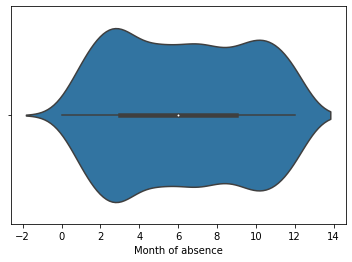

In [11]:
sns.violinplot(x='Month of absence',data=df2)
plt.show()

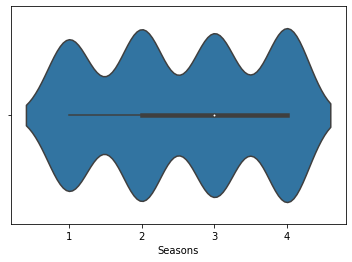

In [12]:
sns.violinplot(x='Seasons',data=df2)
plt.show()

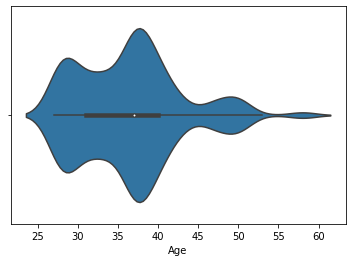

In [13]:
sns.violinplot(x='Age',data=df2)
plt.show()

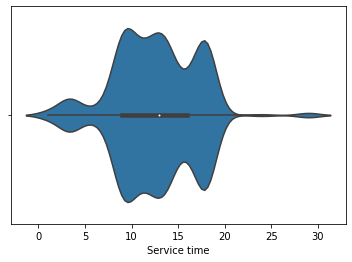

In [14]:
sns.violinplot(x='Service time',data=df2)
plt.show()

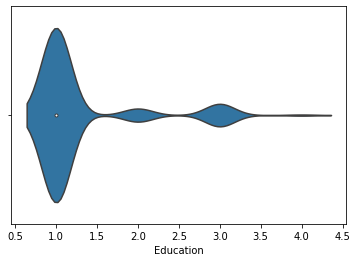

In [15]:
sns.violinplot(x='Education',data=df2)
plt.show()

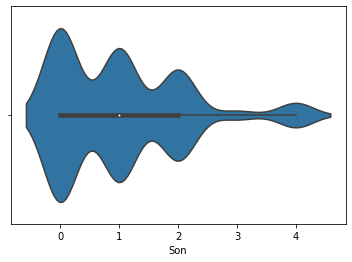

In [16]:
sns.violinplot(x='Son',data=df2)
plt.show()

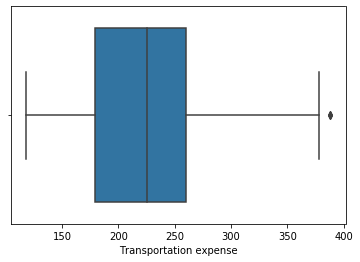

In [17]:
sns.boxplot(x='Transportation expense',data=df2)
plt.show()

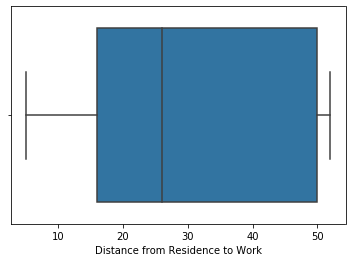

In [18]:
sns.boxplot(x='Distance from Residence to Work',data=df2)
plt.show()

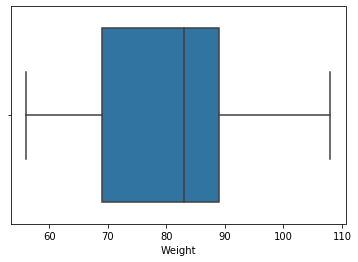

In [19]:
sns.boxplot(x='Weight',data=df2)
plt.show()

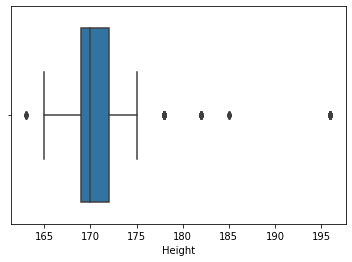

In [20]:
sns.boxplot(x='Height',data=df2)
plt.show()

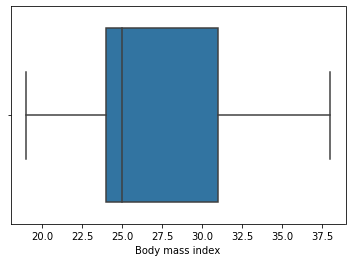

In [21]:
sns.boxplot(x='Body mass index',data=df2)
plt.show()

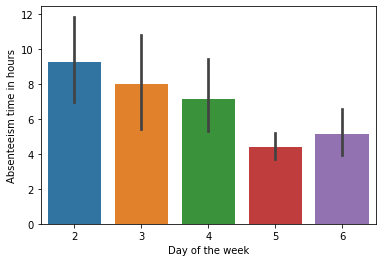

In [22]:
sns.barplot(x='Day of the week',y='Absenteeism time in hours',data=df2)

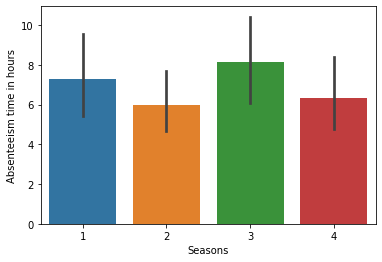

In [23]:
sns.barplot(x='Seasons',y='Absenteeism time in hours',data=df2)

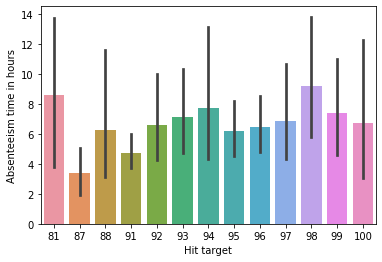

In [24]:
sns.barplot(x='Hit target',y='Absenteeism time in hours',data=df2)

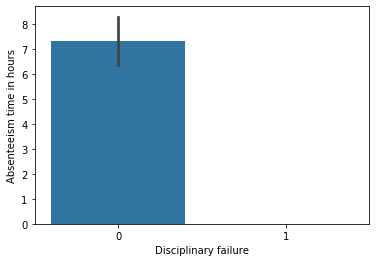

In [25]:
sns.barplot(x='Disciplinary failure',y='Absenteeism time in hours',data=df2)

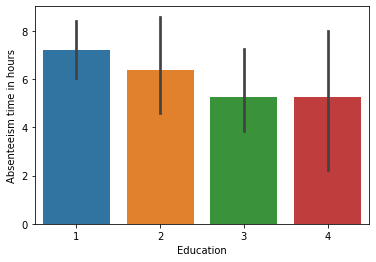

In [26]:
sns.barplot(x='Education',y='Absenteeism time in hours',data=df2)

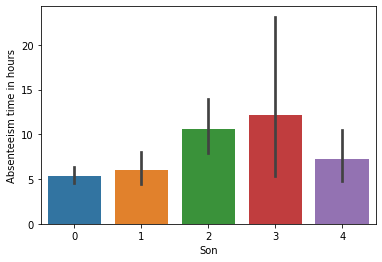

In [27]:
sns.barplot(x='Son',y='Absenteeism time in hours',data=df2)

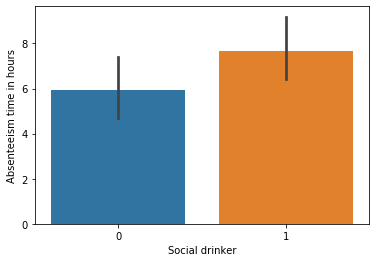

In [28]:
sns.barplot(x='Social drinker',y='Absenteeism time in hours',data=df2)

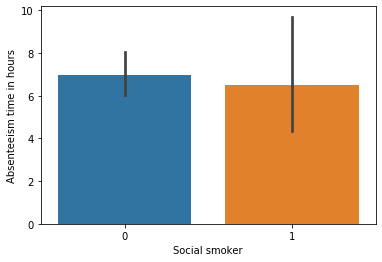

In [29]:
sns.barplot(x='Social smoker',y='Absenteeism time in hours',data=df2)

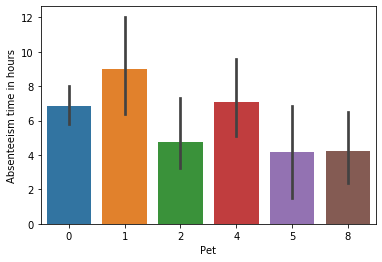

In [30]:
sns.barplot(x='Pet',y='Absenteeism time in hours',data=df2)

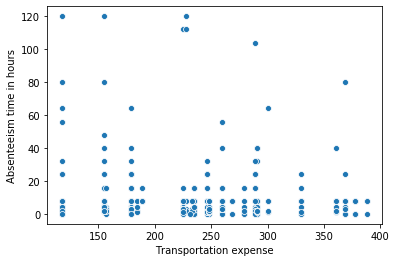

In [31]:
sns.scatterplot(x='Transportation expense',y='Absenteeism time in hours',data=df2)

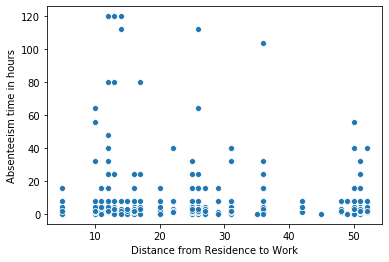

In [32]:
sns.scatterplot(x='Distance from Residence to Work',y='Absenteeism time in hours',data=df2)

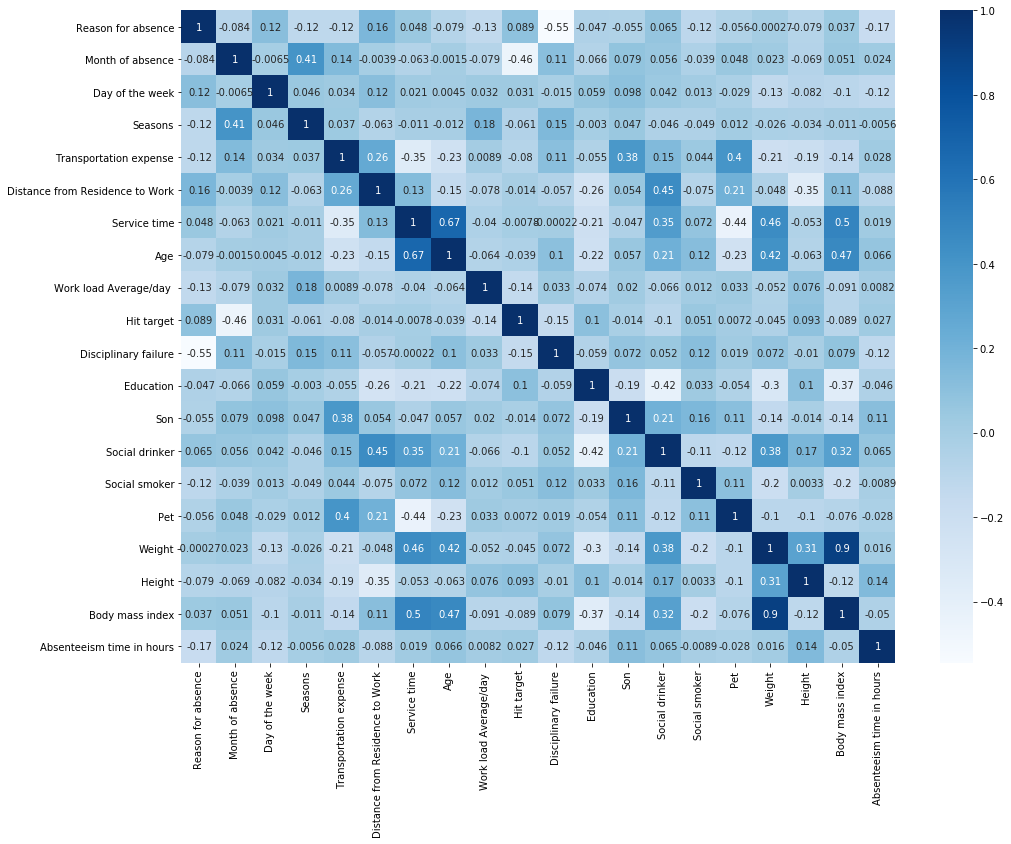

In [33]:
plt.figure(figsize=(16,12))
sns.heatmap(df2.corr(),cmap='Blues',annot=True)

In [34]:
df2.skew()

Reason for absence                -0.915312
Month of absence                   0.069369
Day of the week                    0.102440
Seasons                           -0.038532
Transportation expense             0.396189
Distance from Residence to Work    0.312083
Service time                      -0.004720
Age                                0.697703
Work load Average/day              0.050294
Hit target                        -1.261708
Disciplinary failure               3.952270
Education                          2.108953
Son                                1.086465
Social drinker                    -0.273327
Social smoker                      3.290333
Pet                                2.735715
Weight                             0.017001
Height                             2.566060
Body mass index                    0.305046
Absenteeism time in hours          5.720728
dtype: float64

In [35]:
z=np.abs(zscore(df2))
print(np.where(z>3))

(array([  1,   3,   8,  27,  31,  31,  33,  33,  38,  38,  44,  50,  51,
        54,  55,  58,  64,  83,  85,  89,  91,  99, 104, 116, 140, 157,
       158, 164, 165, 167, 169, 172, 180, 186, 188, 197, 199, 200, 203,
       203, 203, 205, 206, 210, 213, 213, 214, 215, 215, 216, 226, 231,
       232, 234, 236, 242, 245, 251, 253, 255, 256, 257, 270, 271, 272,
       273, 273, 274, 275, 276, 276, 277, 277, 278, 279, 280, 281, 282,
       283, 284, 285, 285, 286, 287, 288, 293, 294, 299, 300, 303, 311,
       312, 313, 313, 322, 323, 323, 325, 336, 336, 337, 337, 355, 360,
       362, 384, 396, 397, 400, 405, 406, 407, 420, 421, 432, 433, 434,
       446, 468, 469, 469, 471, 479, 481, 488, 498, 507, 510, 513, 521,
       530, 548, 549, 551, 562, 564, 569, 569, 572, 573, 575, 576, 577,
       579, 592, 594, 601, 603, 608, 620, 622, 622, 640, 647, 648, 652,
       661, 670, 675, 681, 682, 682, 683, 688, 690, 690, 691, 692, 692,
       695, 702, 703, 704, 706, 710, 712, 714, 714, 714, 715, 7

In [36]:
df2n=df2[(z<3).all(axis=1)]
df2n.shape

(576, 20)

In [37]:
df2n.skew()

Reason for absence                -1.027334
Month of absence                   0.109690
Day of the week                    0.082048
Seasons                           -0.019301
Transportation expense             0.327717
Distance from Residence to Work    0.199294
Service time                      -0.153111
Age                                0.517042
Work load Average/day              0.133439
Hit target                        -0.461369
Disciplinary failure               0.000000
Education                          1.990046
Son                                1.447470
Social drinker                    -0.188822
Social smoker                      0.000000
Pet                                1.721238
Weight                            -0.128296
Height                             1.449688
Body mass index                    0.037118
Absenteeism time in hours          3.171312
dtype: float64

In [38]:
df2n['Education']=boxcox(df2n['Education'],0)

In [39]:
df2n['Son']=np.log1p(df2n['Son'])

In [40]:
df2n['Pet']=np.log1p(df2n['Pet'])

In [41]:
df2n['Height']=np.log1p(df2n['Height'])

In [42]:
df2n.skew()

Reason for absence                -1.027334
Month of absence                   0.109690
Day of the week                    0.082048
Seasons                           -0.019301
Transportation expense             0.327717
Distance from Residence to Work    0.199294
Service time                      -0.153111
Age                                0.517042
Work load Average/day              0.133439
Hit target                        -0.461369
Disciplinary failure               0.000000
Education                          1.930313
Son                                0.575525
Social drinker                    -0.188822
Social smoker                      0.000000
Pet                                0.962203
Weight                            -0.128296
Height                             1.367054
Body mass index                    0.037118
Absenteeism time in hours          3.171312
dtype: float64

In [43]:
x=df2n.iloc[:,0:-1]
y=df2n.iloc[:,-1]
x.shape,y.shape

((576, 19), (576,))

In [44]:
m=MinMaxScaler()
x=m.fit_transform(x)

In [45]:
maxr=0
for i in range(40,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.33)
    lm=LinearRegression(normalize=True)
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    score=lm.score(x_train,y_train)
    print('accuracy score correspondng to random state',i,'is:',score)
    if score>maxr:
        maxr=score
        finalr=i
print()
print('Maximum score corresponding to random state',finalr,'is',maxr)


accuracy score correspondng to random state 40 is: 0.2498184163276621
accuracy score correspondng to random state 41 is: 0.2621801453066892
accuracy score correspondng to random state 42 is: 0.2418587447487267
accuracy score correspondng to random state 43 is: 0.2336324711084916
accuracy score correspondng to random state 44 is: 0.23930113658782892
accuracy score correspondng to random state 45 is: 0.23730329030071565
accuracy score correspondng to random state 46 is: 0.213818027399424
accuracy score correspondng to random state 47 is: 0.23658970649462555
accuracy score correspondng to random state 48 is: 0.25256911159646267
accuracy score correspondng to random state 49 is: 0.23396422713175902
accuracy score correspondng to random state 50 is: 0.21179854539634224
accuracy score correspondng to random state 51 is: 0.24439041605070244
accuracy score correspondng to random state 52 is: 0.26710430803312135
accuracy score correspondng to random state 53 is: 0.2186933227364195
accuracy scor

In [46]:
ls=Lasso()
alphavalue={'alpha':[0.0001,0.001,0.01,0.1,1.0]}
grid=GridSearchCV(ls,param_grid=alphavalue)
grid.fit(x,y)
print(grid)
print(grid.best_score_)
print(grid.best_params_)

GridSearchCV(cv=None, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
0.11210837986868334
{'alpha': 0.1}


In [47]:
ls=Lasso(alpha=0.1)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.22333244092218585

In [48]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
predr=rf.predict(x_test)
print(rf.score(x_train,y_train))


0.8289878450942781


In [49]:
joblib.dump(rf,'rfabsent.obj')

['rfabsent.obj']